### Authorship
@author: Alexandre Pereira Santos <br>
alexandre.santos(at)lmu.de<br>
- many scripts in this notebook com from geemap (see below)

### Tasks
- open a list of raster files
- convert and save all rasters as ASCII

### Prerequisites
- Rasters should be in the appropriate CRS, as no projection is used
- rasterio

# init

In [2]:
from pathlib import Path
import rasterio
import matplotlib.pyplot as plt

from rasterio import features
import numpy as np
from rasterio.plot import show

def get_coords(gdf):
    coords = gdf.envelope
    epsg_coords = coords #.crs.to_epsg()
    transform = [coords.bounds.values[0][0], coords.bounds.values[0][1], coords.bounds.values[0][2], coords.bounds.values[0][3]]
    #roi = ee.Geometry.BBox(west=transform[0], south=transform[1], east=transform[2], north=transform[3])
    #rec_roi = ee.Geometry.Rectangle(transform[0],transform[1],transform[2],transform[3])
    #coi = roi.centroid(maxError=1)
    return epsg_coords, transform #roi, rec_roi, coi

# imports

In [4]:
# import a list of raster files
# all files should be in the same folder and share the projection

raster_folder = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\')
MUM_raster_list = [ 'MUM_DEM_slope_TanDEM_X_30m.tif','MUM_DEM_hillshade_TanDEM_X_30m.tif',
                'MUM_URB_slum_clusters_MMRDA_1985_30m.tif','MUM_URB_slum_clusters_MMRDA_2000_30m.tif','MUM_URB_slum_clusters_MMRDA_2015_30m.tif',
                'MUM_URB_urbanisation_1985_EOC_WUF_30m.tif','MUM_URB_urbanisation_2000_EOC_WUF_30m.tif','MUM_URB_urbanisation_2015_EOC_WUF_30m.tif',
                'MUM_POP_population_1985_GHSL_30m.tif','MUM_POP_population_2000_GHSL_30m.tif','MUM_POP_population_2015_GHSL_30m.tif',
                'MUM_ENV_NDVI_Sentinel2_2000_30m.tif','MUM_ECO_Real_Estate_Prices_2021_30m.tif'] # to include:  land use

JAK_raster_list = ['JAK_DEM_slope_TanDEM_X_30m.tif', 'JAK_DEM_hillshade_TanDEM_X_30m.tif',
                   'JAK_URB_urbanisation_1985_EOC_WUF_30m.tif','JAK_URB_urbanisation_2000_EOC_WUF_30m.tif','JAK_URB_urbanisation_2015_EOC_WUF_30m.tif',
               '']

MAN_raster_list = ['MAN_DEM_slope_TanDEM_X_30m.tif','MAN_DEM_hillshade_TanDEM_X_30m.tif',
                'MAN_URB_urbanisation_1985_EOC_WUF_30m.tif','MAN_URB_urbanisation_2000_EOC_WUF_30m.tif','MAN_URB_urbanisation_2015_EOC_WUF_30m.tif',
               '']

In [9]:
# define a function that opens a list of raster files and stores them in a list (should it be a dict?)
# the function should also print the crs of the raster files
def open_raster_list(raster_list, raster_folder):
    open_rasters = {}
    array_list = []
    crs_list = []
    transform_list = []
    for raster in raster_list: #[0:3]
        raster_path = raster_folder / raster
        raster_name = raster.split('.')[0]
        array_list.append(raster_name)

    for i in range(len(array_list)):
        with rasterio.open(raster_path, 'r') as array_list[i]:
            array = array_list[i].read(1)
            crs = array_list[i].crs
            transform = array_list[i].transform
            print(array_list[i].crs)
            #array_list.append(array)
            #crs_list.append(crs)
            #transform_list.append(transform)
            # update the dict open_rasters with the arrays, crs and transform
            open_rasters[array_list[i]['array']] = array
            open_rasters[array_list[i]['crs']] = crs
            open_rasters[array_list[i]['transform']] = transform
    return open_rasters

In [10]:
# import the rasters for each city at a time
input_which_city = input('Which city do you want to import the rasters for? (1 = MUM, 2 = JAK, 3 = MAN:')
if input_which_city == '1':
    raster_list = MUM_raster_list
elif input_which_city == '2':
    raster_list = JAK_raster_list
elif input_which_city == '3':
    raster_list = MAN_raster_list
else:
    print('Please enter a valid city number')
    exit()

list_open_raster = open_raster_list(raster_list, raster_folder)


EPSG:32643


TypeError: 'DatasetReader' object is not subscriptable

In [21]:
list_open_raster

# analysis

In [17]:
# convert each raster in list_open_raster to a numpy array




RasterioIOError: Dataset is closed: D:/Dropbox/x/PostDoc/23 10 LMU/13 exp_cases/24 01 Urban SSP MAN MUM JAK/GIS_temp/MUM_DEM_slope_TanDEM_X_30m.tif

In [76]:
# Load roads data for one of the cities
global distance_raster_file
global major_road_raster_file
global full_road_raster_file

city = input('Choose the city: 1  = Jakarta, 2 = Mumbai, 3 = Manila')
if city == '1':
    roads_gdf = JAK_roads
    distance_raster_file = 'JAK_TRA_distance_to_major_roads.tif'
    major_road_raster_file = 'JAK_TRA_major_roads_OSM_2024.tif'
    full_road_raster_file = 'JAK_TRA_all_roads_OSM_2024.tif'
    ref_raster = JAK_ref_raster
elif city == '2':
    roads_gdf = MUM_roads
    distance_raster_file = 'MUM_TRA_distance_to_major_roads.tif'
    major_road_raster_file = 'MUM_TRA_major_roads_OSM_2024.tif'
    full_road_raster_file = 'MUM_TRA_all_roads_OSM_2024.tif'
    ref_raster = MUM_ref_raster
elif city == '3':
    roads_gdf = MAN_roads.to_crs(epsg=4326)
    distance_raster_file = 'MAN_TRA_distance_to_major_roads.tif'
    major_road_raster_file = 'MAN_TRA_major_roads_OSM_2024.tif'
    full_road_raster_file = 'MAN_TRA_all_roads_OSM_2024.tif'
    ref_raster = MAN_ref_raster


# Filter roads where major == 1
major_roads_gdf = roads_gdf[roads_gdf['major'] == 1]

# Get the geometry of the major roads
major_geom = [shapes for shapes in major_roads_gdf.geometry]

# Rasterize the major roads, script from https://pygis.io/docs/e_raster_rasterize.html
major_roads_raster = features.rasterize(major_geom,
                                out_shape = ref_raster.shape,
                                fill = 0,
                                out = None,
                                transform = ref_raster.transform,
                                all_touched = True,
                                default_value = 1,
                                dtype = None)

# Get the geometry of the all roads
full_geom = [shapes for shapes in roads_gdf.geometry]

# Rasterize the all roads, script from https://pygis.io/docs/e_raster_rasterize.html
full_roads_raster = features.rasterize(full_geom,
                                out_shape = ref_raster.shape,
                                fill = 0,
                                out = None,
                                transform = ref_raster.transform,
                                all_touched = True,
                                default_value = 1,
                                dtype = None)

# Invert the raster: roads (value == 1) become 0, non-roads become 1
inverted_roads_raster = np.where(major_roads_raster == 1, 0, 1)

# Calculate the distance to the nearest road for each cell
distance_to_roads = distance_transform_edt(inverted_roads_raster)
# Assuming the raster's resolution is in meters, the distance_to_roads array now contains the distance in meters to the nearest road for each cell

<Axes: >

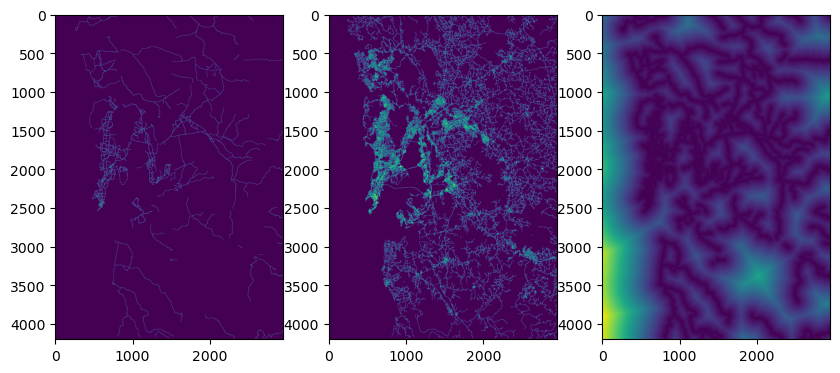

In [78]:
# Plot the three rasters
fig, ax = plt.subplots(nrows=1, ncols = 3, figsize = (10, 30))
show(major_roads_raster, ax = ax[0])
show(full_roads_raster, ax = ax[1])
show(distance_to_roads, ax = ax[2],cmap='viridis')

plt.gca() 

# export

In [42]:
# define two export functions
# export rasters as geotiff
def export_raster(raster,url):
    with rasterio.open(
        url, "w",
        driver = "GTiff",
        crs = ref_raster.crs,
        transform = ref_raster.transform,
        dtype = rasterio.float32,
        count = 1,
        width = ref_raster.width,
        height = ref_raster.height) as dst:
        dst.write(raster, indexes = 1)

# export raster as ascii files
def export_raster_to_ascii(raster_obj, export_path, raster_data_type):
    with rasterio.open(export_path, "w", driver='AAIGrid',
                    height = ref_raster.shape[0], width=ref_raster.shape[1],
                    count=1, dtype=list(ref_raster.dtypes)[0],
                    crs=ref_raster.crs, transform = ref_raster.transform) as dest:
        dest.write(raster_obj.astype(raster_data_type), indexes=1)

In [44]:
# export the calculated arrays as raster files in geotiff format
out_path = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\GIS_temp\\')
distance_url = out_path/distance_raster_file
major_roads_url = out_path/major_road_raster_file
full_roads_url = out_path/full_road_raster_file

export_raster(distance_to_roads,distance_url)
export_raster(major_roads_raster,major_roads_url)
export_raster(full_roads_raster,full_roads_url)

In [45]:
# export the calculated arrays as ASCII files
# define the ASCII file names
out_path = Path(r'D:\\Dropbox\\x\\PostDoc\\23 10 LMU\\13 exp_cases\\24 01 Urban SSP MAN MUM JAK\\CityCell\\')

distance_ascii_url = out_path/(distance_raster_file.split('.')[0] + '.asc')
major_roads_ascii_url = out_path/(major_road_raster_file.split('.')[0] + '.asc')
full_roads_ascii_url = out_path/(full_road_raster_file.split('.')[0] + '.asc')

# call the ASCII export function
export_raster_to_ascii(distance_to_roads, distance_ascii_url,rasterio.float32)
export_raster_to_ascii(major_roads_raster, major_roads_ascii_url,rasterio.int16)
export_raster_to_ascii(full_roads_raster, full_roads_ascii_url,rasterio.int16)
